## Analyze A/B Test Results

This is a statistical analysis project that I have done as part of the Data Analyst nanodegree program in Udacity. The aim of the project is to assure that I have mastered the concepts of the statistics involved in data analysis and data science.  The hope is to have this project be as comprehensive of those topics as possible. I have used Python and the associated libraries including pandas, numpy, statsmodels and matplotlib. I have performed data wrangling, statistical analysis, A/B testing and unsupervised learning (regression analysis) to check if a new web page design induced more people to subscribe to the page (convert). 

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these. 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Load the dataset and check the format
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Count the number of rows
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
# Count the number of unique users
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
(df['converted'] == 1).mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
((df['group'] == 'treatment') != (df['landing_page'] == 'new_page')).sum()

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) | ((df['group'] == 'control') == (df['landing_page'] == 'old_page'))]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the incorrect rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]
df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2.user_id.duplicated().sum()
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

2893 	773192 	2017-01-14 02:55:59.590927 	treatment 	new_page 	0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [12]:
df2.drop_duplicates(subset = 'user_id', inplace = True)
df2.user_id.duplicated().sum()

/home/renjini/anaconda3/envs/data/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0

`4.` Use **df2** in the below cells.

a. What is the probability of an individual converting regardless of the page they receive?

In [13]:
# Probability of conversion altogether
P = df2.query('converted == 1').count()[0]/df2.shape[0]
P

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [14]:
# Probability of conversion for the control group, Pold
control_df = df.query('group == "control"')
Pold = control_df.query('converted == 1').count()[0]/control_df.shape[0]
Pold

0.12039917935897611

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [15]:
# Probability of conversion for the treatment group, Pnew
treatment_df = df.query('group == "treatment"')
Pnew = treatment_df.query('converted == 1').count()[0]/treatment_df.shape[0]
Pnew

0.11891957956489856

d. What is the probability that an individual received the new page?

In [16]:
# Probability of receiving the new page (should be 50% to avoid bias)
Pnp = df2.query('landing_page == "new_page"').count()[0]/df2.shape[0]
Pnp

0.5000619442226688

In [17]:
# The difference between the probabilities of conversions for treatment and control groups
Pdif = Pnew - Pold
Pdif

-0.0014795997940775518

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**There is not sufficient evidence to suggest that the new page caused more people to convert. Around 50% of the users received the new page, showing that there was no bias in the number of people in either group. Still, the conversion rate for both the control and treatment group were approximately 12% indicating that the new page was as good as the old page in making people pay (convert). **

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$$H_0: P_{new} - P_{old} <= 0  $$**
**$$H_1: P_{new} - P_{old} > 0  $$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  <br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
#Convert rate for Pnew under null
Cnew = df2['converted'].mean()
Cnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
#Convert rate for Pold under null
Cold = df2['converted'].mean()
Cold

0.11959708724499628

c. What is $n_{new}$?

In [20]:
#Number of entries in the treament group
Nnew = df2.query('group == "treatment"').count()[0]
Nnew

145310

d. What is $n_{old}$?

In [21]:
#Number of entries in the treament group
Nold = df2.query('group == "control"').count()[0]
Nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.binomial(1, Cnew, Nnew)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.binomial(1, Cold, Nold)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
Pnew = new_page_converted.mean()
Pold = old_page_converted.mean()
Pnew - Pold

-0.0004565435961694786

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
p_diffs = []
for i in range(10000):
    P= df2['converted'].mean()
    new_page_converted = np.random.binomial(1, P, Nnew)
    old_page_converted = np.random.binomial(1, P, Nold)
    Pnew = new_page_converted.mean()
    Pold = old_page_converted.mean()
    diff = Pnew - Pold
    p_diffs.append(diff)  

In [26]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

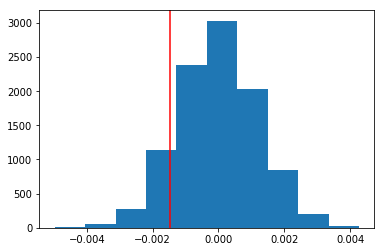

In [27]:
plt.hist(p_diffs)
plt.axvline(x = Pdif, color = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
# probability of a statistic higher than observed
prob_more_extreme_high = (p_diffs > Pdif).mean()
prob_more_extreme_high

0.8885

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The computed prob_more_extreme_high is the p-value for the hypothesis testing. The p-value is the probability of finding our statistic or one extreme in favor of the alternative, if the null hypothesis is true. We find that this probability is high (around 90%) under the null hypothesis, much lesser than our requirement of less than 5% (0.05). So we fail to reject the null hypothesis. In other words, we conclude that there is not enough statistical evidence to conclude that the new page caused more people to convert.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
# Calculate the number of conversions for the old and new pages
convert_old = df2.query('landing_page == "old_page" and converted == 1').count()[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').count()[0]

# Calculate the total number of entries for old and new pages
n_old = df2.query('landing_page == "old_page"').count()[0]
n_new = df2.query('landing_page == "new_page"').count()[0]
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
z_score, p_value = sm.stats.proportions_ztest([17489, 17264], [145274, 145310])
z_score, p_value

(1.3109241984234394, 0.18988337448195103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Yes, these values agree with the previous findings. The z-score for a two-tailed test as computed here for a binomial distribution would be significant past -1.96 and 1.96. Since it is lower, it shows that the difference between the number of conversions with the new page and old page is not significant. For the two-tailed test, the p-value is also higher than 0.05, hence we still fail to reject the null hypothesis that the conversion rates between the old and new pages are not different.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since the conversions follow a binomial distribution (two possible outcomes), we should use logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
df2['intercept'] = 1
df2[['group', 'treatment']] = pd.get_dummies(df2['group'])
df2.head()

/home/renjini/anaconda3/envs/data/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/renjini/anaconda3/envs/data/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,treatment
0,851104,2017-01-21 22:11:48.556739,1,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,1,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,0,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,0,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,1,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
results = sm.Logit(df2['converted'], df2[['intercept', 'treatment']]).fit().summary()
results

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 Nov 2018   Pseudo R-squ.:               8.077e-06
Time:                        21:16:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
1/np.exp(-0.0150)

1.015113064615719

**Here we find that the log factor change for the group variable is approximately equal to one. That is, the treatment group is as good as the control in converting people OR there is no significant change in the conversion rate due to the group variable.**

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value is 0.190, which means that we stick with the null hypothesis. In part II, we had seen that the p-value is close to 0.90. The null hypothesis there was that the conversion rate for the control group was greater than or equal to the treatment group, it was a one-tailed analysis. With the regression analysis, the null hypothesis is that the conversion rates of control and treatment groups are not equal, which is a two-tailed test. This accounts for the difference in p-values between the AB test and the logistic regression analysis for this parameter.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**To understand additional factors that might influence a statistic, it would be useful to add additional factors depending on the context. Adding too many factors can be a disadvantage though, due to problems of over-fitting the model, noise and multicollinearity.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [35]:
df_new.country.unique()
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,treatment
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,1,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,0,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,0,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,1,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,0,new_page,0,1,1


In [36]:
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])

In [37]:
results = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'CA']]).fit().summary()
results

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 25 Nov 2018   Pseudo R-squ.:               1.521e-05
Time:                        21:17:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
==============================================================================
"""

In [38]:
np.exp(0.0099), 1/np.exp(-0.0408)

(1.0099491671175422, 1.0416437559600236)

**The odds ratio indicates that for both UK and Canada, the fold change was not significantly different from that of US. The ratio for either was approximately equal to one, indicating that the users from all three countries had similar rates of conversion.  The p-value was higher than 0.05 for the analyses indicating that the changes were not statistically significant.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [39]:
### Create the necessary dummy variables
df_new[['new_page','old_page']] = pd.get_dummies(df_new['landing_page'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,treatment,CA,UK,US,new_page,old_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,1,old_page,0,1,0,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,0,new_page,0,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,0,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,1,old_page,0,1,0,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,0,new_page,0,1,1,0,1,0,1,0


In [40]:
### Fit Your linear Model And Obtain the Results
results = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'CA', 'new_page']]).fit().summary()
results

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 25 Nov 2018   Pseudo R-squ.:               2.323e-05
Time:                        21:17:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
new_page      -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

In [41]:
np.exp(0.0099), 1/np.exp(-0.0408), 1/np.exp(-0.0149)

(1.0099491671175422, 1.0416437559600236, 1.0150115583846535)

**Again, the odds ratio indicates that for both UK and Canada, with the added variable of the landing page, the fold changes are not significantly different. The ratio for all analyses were approximately equal to one, indicating that the users from all three countries had similar rates of conversion, with either treatment. The p-value was higher than 0.05 for all the analyses indicating that the changes were not statistically significant.**

<a id='conclusions'></a>
## Conclusions

**Based on the A/B testing and regression models, we fail to reject the null hypothesis that the conversion rates for control and treatment groups subjected to the old and new formats of the webpages respectively, were not significantly different statistically. Hence the likelihood of more people converting due to the newer format is low. Since the sample size is good enough, it does not seem useful to repeat the analysis with a bigger sample size.**

